# **Set-up**

In [ ]:
# Install libraries
!git clone https://github.com/lurosenb/superquail
!pip install aif360==0.3.0 
!pip install BlackBoxAuditing
!pip install tensorflow==1.13.1
!pip install folktables
!pip install shap==0.39.0

Cloning into 'superquail'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 1), reused 20 (delta 1), pack-reused 0
Unpacking objects: 100% (24/24), done.
     |████████████████████████████████| 165 kB 4.5 MB/s 
     |████████████████████████████████| 2.6 MB 5.5 MB/s 
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394770 sha256=37aa380c772145ca029066374bb9f60f37ce3f0c3eb78971cbe2ec10131f4327
  Stored in directory: /root/.cache/pip/wheels/05/9f/ee/541a74be4cf5dad17430e64d3276370ea7b6a834a76cb4215a
Successfully built BlackBoxAuditing
     |████████████████████████████████| 92.6 MB 61 kB/s 
     |████████████████████████████████| 3.2 MB 14.2 MB/s 
     |████████████████████████████████| 367 kB 38.9 MB/s 
     |████████████████████████████████| 50 kB 4.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installa

In [ ]:
# Install DataSynthesizer
!pip install DataSynthesizer

In [ ]:
# Import libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, cross_val_score 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc

from aif360.datasets import BinaryLabelDataset, StandardDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.algorithms.inprocessing import PrejudiceRemover, AdversarialDebiasing
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing, RejectOptionClassification
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.explainers import MetricTextExplainer, MetricJSONExplainer

from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import copy

import json
from collections import OrderedDict
from IPython.display import Markdown, display
from IPython.display import Image
from IPython.core.display import HTML

import shap 
import operator
from collections import defaultdict
shap.initjs()
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
pip install 'aif360[LFR]'
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a

In [ ]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in data
# student_df =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/StudentsPerformance.csv')
student_df =  pd.read_csv('/content/drive/MyDrive/RDS project/StudentsPerformance.csv')
student_df.head()

student_df_2 = student_df.copy()

#**Basic data evaluation**

In [ ]:
# list of features
student_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# categorical features
print("Categories in 'gender' variable: ",end=" ")
print(student_df['gender'].unique())
print("Categories in 'race/ethnicity' variable: ",end=" ")
print(student_df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable: ",end=" ")
print(student_df['parental level of education'].unique())
print("Categories in 'lunch' variable: ",end=" ")
print(student_df['lunch'].unique())
print("Categories in 'test preparation course' variable: ",end=" ")
print(student_df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [ ]:
# statistics of output features
student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# check for null values
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# feature distributions
# gender
student_df['gender'].value_counts() / len(student_df)

female    0.518
male      0.482
Name: gender, dtype: float64

In [ ]:
# race/ethnicity
student_df['race/ethnicity'].value_counts() / len(student_df)

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64

In [ ]:
# parental level of education
student_df['parental level of education'].value_counts() / len(student_df)

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64

In [ ]:
# lunch
student_df['lunch'].value_counts() / len(student_df)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [ ]:
# prep course
student_df['test preparation course'].value_counts() / len(student_df)

none         0.642
completed    0.358
Name: test preparation course, dtype: float64

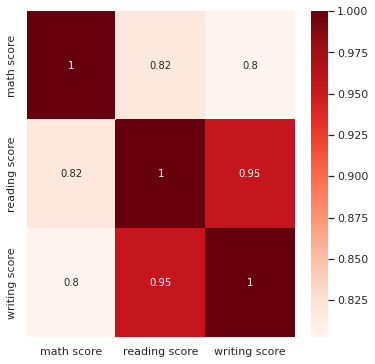

In [ ]:
# correlations of output features
plt.figure(figsize=(6,6))
cor = student_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# **Histogram distributions of data features**

Histograms of input features

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


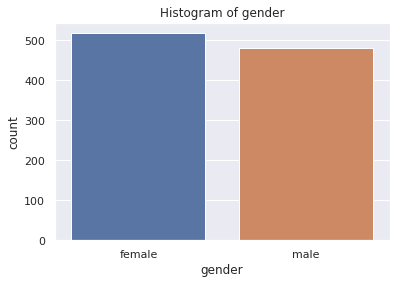

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


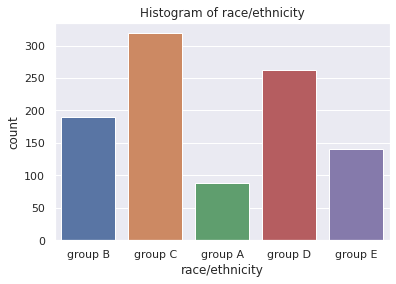

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


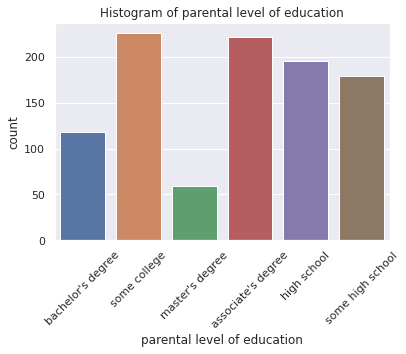

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


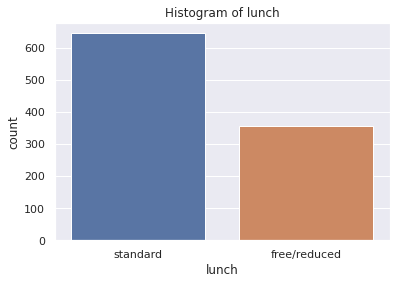

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


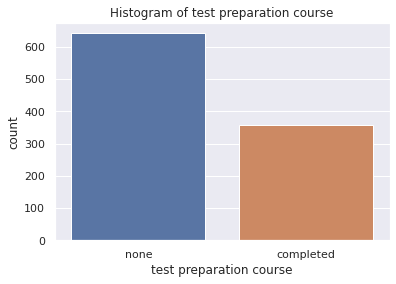

In [ ]:
# histograms input features
sns.countplot(student_df["gender"])
plt.title('Histogram of gender')
plt.show()
sns.countplot(student_df["race/ethnicity"],)
plt.title('Histogram of race/ethnicity')
plt.show()
sns.countplot(student_df["parental level of education"])
plt.xticks(rotation=45)
plt.title('Histogram of parental level of education')
plt.show()
sns.countplot(student_df["lunch"])
plt.title('Histogram of lunch')
plt.show()
sns.countplot(student_df["test preparation course"])
plt.title('Histogram of test preparation course')
plt.show()

Histograms of output features

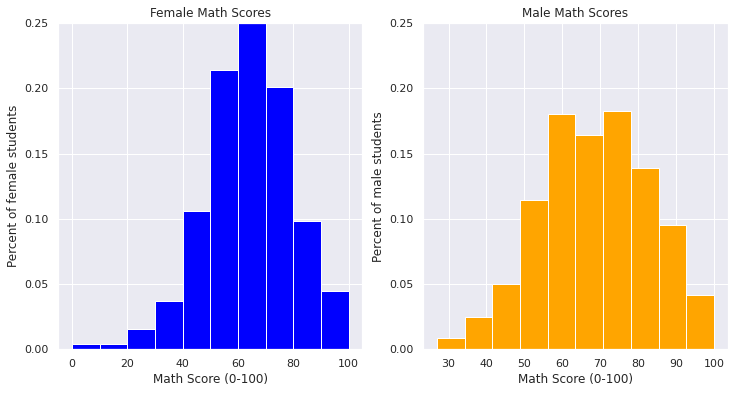

In [ ]:
# math by gender
df_female = student_df[(student_df.gender == "female")].copy()
df_male = student_df[(student_df.gender== "male")].copy()

fig = plt.figure(figsize = (12, 6))
fig.add_subplot(121)

plt.hist(df_female["math score"],
         weights = np.ones(len(df_female["math score"])) /
         len(df_female["math score"]), color='blue')
plt.xlabel("Math Score (0-100)")
plt.ylabel("Percent of female students")
plt.title("Female Math Scores")
plt.ylim([0, 0.25])

fig.add_subplot(122)
plt.hist(df_male["math score"],
         weights = np.ones(len(df_male["math score"])) /
         len(df_male["math score"]), color='orange')
plt.xlabel("Math Score (0-100)")
plt.ylabel("Percent of male students")
plt.title("Male Math Scores")
plt.ylim([0, 0.25])
plt.show()

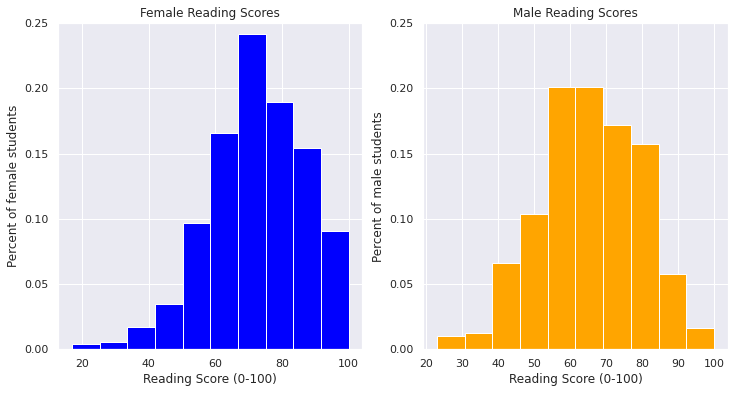

In [ ]:
# reading by gender
df_female = student_df[(student_df.gender == "female")].copy()
df_male   = student_df[(student_df.gender== "male")].copy()

fig = plt.figure(figsize = (12, 6))
fig.add_subplot(121)
 
plt.hist(df_female["reading score"],
         weights = np.ones(len(df_female["reading score"])) /
         len(df_female["reading score"]), color='blue')
plt.xlabel("Reading Score (0-100)")
plt.ylabel("Percent of female students")
plt.title("Female Reading Scores")
plt.ylim([0, 0.25])

fig.add_subplot(122)
plt.hist(df_male["reading score"],
         weights = np.ones(len(df_male["reading score"])) /
         len(df_male["reading score"]), color='orange')
plt.xlabel("Reading Score (0-100)")
plt.ylabel("Percent of male students")
plt.title("Male Reading Scores")
plt.ylim([0, 0.25])
plt.show()

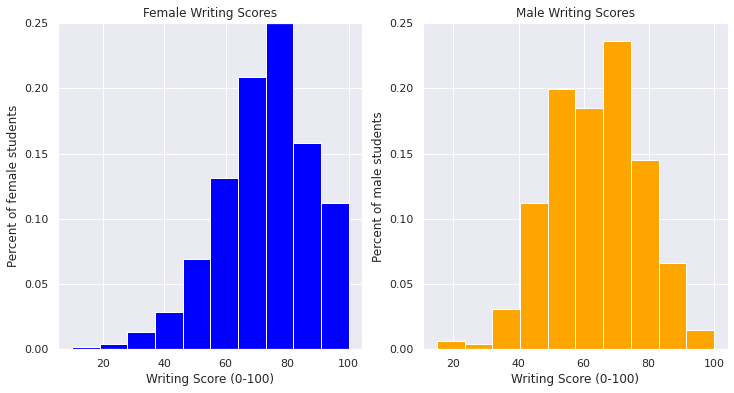

In [ ]:
# writing by gender
df_female = student_df[(student_df.gender == "female")].copy()
df_male   = student_df[(student_df.gender== "male")].copy()

fig = plt.figure(figsize = (12, 6))
fig.add_subplot(121)

plt.hist(df_female["writing score"],
         weights = np.ones(len(df_female["writing score"])) /
         len(df_female["writing score"]), color='blue')
plt.xlabel("Writing Score (0-100)")
plt.ylabel("Percent of female students")
plt.title("Female Writing Scores")
plt.ylim([0, 0.25])

fig.add_subplot(122)
plt.hist(df_male["writing score"],
         weights = np.ones(len(df_male["writing score"])) /
         len(df_male["writing score"]), color='orange')
plt.xlabel("Writing Score (0-100)")
plt.ylabel("Percent of male students")
plt.title("Male Writing Scores")
plt.ylim([0, 0.25])
plt.show()

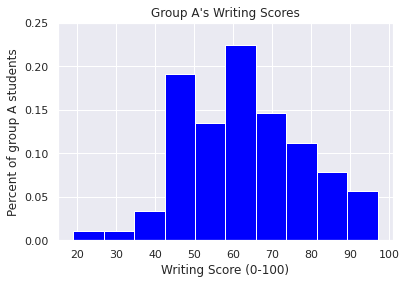

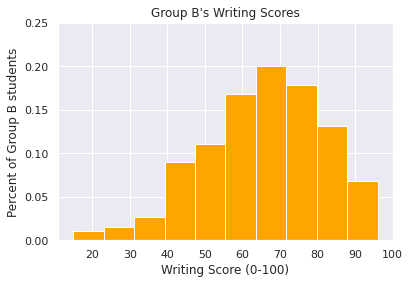

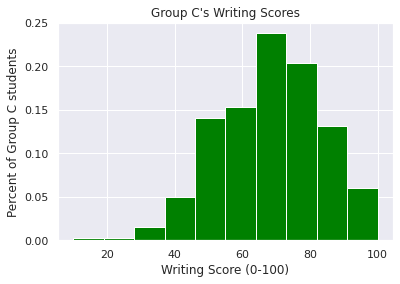

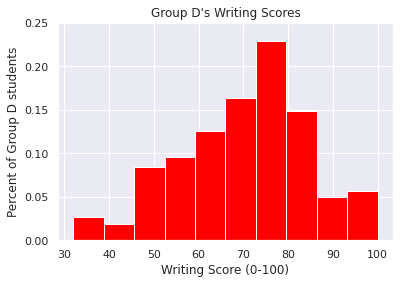

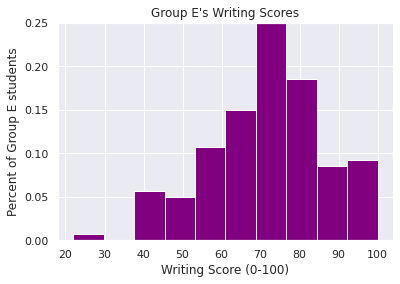

In [ ]:
# writing by race/ethnicity
# the same can be repeated for math and reading
df_groupA = student_df[(student_df['race/ethnicity'] == "group A")].copy()
df_groupB  = student_df[(student_df['race/ethnicity'] == "group B")].copy()
df_groupC = student_df[(student_df['race/ethnicity'] == "group C")].copy()
df_groupD  = student_df[(student_df['race/ethnicity'] == "group D")].copy()
df_groupE = student_df[(student_df['race/ethnicity'] == "group E")].copy()

plt.hist(df_groupA["writing score"],
         weights = np.ones(len(df_groupA["writing score"])) /
         len(df_groupA["writing score"]), color='blue')
plt.xlabel("Writing Score (0-100)")
plt.ylabel("Percent of group A students")
plt.title("Group A's Writing Scores")
plt.ylim([0, 0.25])
plt.show()

plt.hist(df_groupB["writing score"],
         weights = np.ones(len(df_groupB["writing score"])) /
         len(df_groupB["writing score"]), color='orange')
plt.xlabel("Writing Score (0-100)")
plt.ylabel("Percent of Group B students")
plt.title("Group B's Writing Scores")
plt.ylim([0, 0.25])
plt.show()

plt.hist(df_groupC["writing score"],
         weights = np.ones(len(df_groupC["writing score"])) /
         len(df_groupC["writing score"]), color='green')
plt.xlabel("Writing Score (0-100)")
plt.ylabel("Percent of Group C students")
plt.title("Group C's Writing Scores")
plt.ylim([0, 0.25])
plt.show()

plt.hist(df_groupD["writing score"],
         weights = np.ones(len(df_groupD["writing score"])) /
         len(df_groupD["writing score"]), color='red')
plt.xlabel("Writing Score (0-100)")
plt.ylabel("Percent of Group D students")
plt.title("Group D's Writing Scores")
plt.ylim([0, 0.25])
plt.show()

plt.hist(df_groupE["writing score"],
         weights = np.ones(len(df_groupE["writing score"])) /
         len(df_groupE["writing score"]), color='purple')
plt.xlabel("Writing Score (0-100)")
plt.ylabel("Percent of Group E students")
plt.title("Group E's Writing Scores")
plt.ylim([0, 0.25])
plt.show()

# **Setting up Pass/Fail outcome feature**

In [ ]:
# helper function for creating pass/fail outcome feature
# cut-offs for pass/fail used by ADS
def result(TS,MS,WS,RS ):
    if(TS>120 and MS>40 and WS>40 and RS>40):
        return 1
    else:
        return 0

In [ ]:
# helper function for creating pass/fail outcome feature
# new cut-offs for pass/fail based on US standards
def result_2(TS,MS,WS,RS ):
    if(TS>180 and MS>60 and WS>60 and RS>60):
        return 1
    else:
        return 0

In [ ]:
# helper function for processing race/ethnicity input feature
def race(x):
  if (x == "group A"):
    return 1
  elif (x == "group B"):
    return 2
  elif (x == "group C"):
    return 3
  elif (x == "group D"):
    return 4
  elif (x == "group E"):
    return 5

In [ ]:
# helper function for processing parental education input feature
def education(x):
  if (x == "bachelor's degree"):
    return 1
  elif (x == "some college"):
    return 2
  elif (x == "master's degree"):
    return 3
  elif (x ==  "associate's degree"):
    return 4
  elif (x == "high school"):
    return 5
  elif (x == "some high school"):
    return 6

In [ ]:
# helper function for processing dataset
# creates pass/fail outcome feature based on ADS cut-offs
def preprocess(student_df):
  student_df['Total Score'] = student_df['math score']+student_df['reading score']+student_df['writing score']
  student_df['Pass/Fail']=student_df.apply(lambda x: result(x['Total Score'],x['math score'],x['writing score'],x['reading score']),axis = 1 )
  student_df['gender'] = student_df['gender'].apply(lambda x: 0 if x=="male" else 1)
  student_df['lunch'] = student_df['lunch'].apply(lambda x: 0 if x=="standard" else 1)
  student_df['test preparation course'] = student_df['test preparation course'].apply(lambda x: 0 if x=="none" else 1)
  student_df['race/ethnicity'] = student_df['race/ethnicity'].apply(lambda x: race(x))
  student_df['parental level of education'] = student_df['parental level of education'].apply(lambda x: education(x) )
  return student_df

In [ ]:
# process dataset
preprocess(student_df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Pass/Fail
0,1,2,1,0,0,72,72,74,218,1
1,1,3,2,0,1,69,90,88,247,1
2,1,2,3,0,0,90,95,93,278,1
3,0,1,4,1,0,47,57,44,148,1
4,0,3,2,0,0,76,78,75,229,1
...,...,...,...,...,...,...,...,...,...,...
995,1,5,3,0,1,88,99,95,282,1
996,0,3,5,1,0,62,55,55,172,1
997,1,3,5,1,1,59,71,65,195,1
998,1,4,2,0,1,68,78,77,223,1


In [ ]:
# helper function for processing dataset
# creates pass/fail outcome feature based on new cut-offs
def preprocess_2(student_df):
  student_df['Total Score'] = student_df['math score']+student_df['reading score']+student_df['writing score']
  student_df['Pass/Fail']=student_df.apply(lambda x: result_2(x['Total Score'],x['math score'],x['writing score'],x['reading score']),axis = 1 )
  student_df['gender'] = student_df['gender'].apply(lambda x: 0 if x=="male" else 1)
  student_df['lunch'] = student_df['lunch'].apply(lambda x: 0 if x=="standard" else 1)
  student_df['test preparation course'] = student_df['test preparation course'].apply(lambda x: 0 if x=="none" else 1)
  student_df['race/ethnicity'] = student_df['race/ethnicity'].apply(lambda x: race(x))
  student_df['parental level of education'] = student_df['parental level of education'].apply(lambda x: education(x) )
  return student_df

In [ ]:
# process dataset
preprocess_2(student_df_2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Pass/Fail
0,1,2,1,0,0,72,72,74,218,1
1,1,3,2,0,1,69,90,88,247,1
2,1,2,3,0,0,90,95,93,278,1
3,0,1,4,1,0,47,57,44,148,0
4,0,3,2,0,0,76,78,75,229,1
...,...,...,...,...,...,...,...,...,...,...
995,1,5,3,0,1,88,99,95,282,1
996,0,3,5,1,0,62,55,55,172,0
997,1,3,5,1,1,59,71,65,195,0
998,1,4,2,0,1,68,78,77,223,1


# **Evaluating pass/fail distributions**

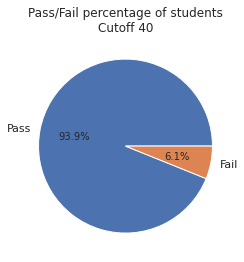

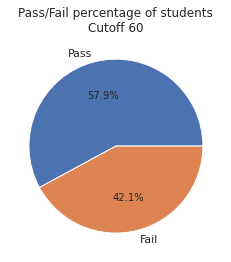

In [ ]:
# pass fail percentages with ADS cut-offs
plt.pie(student_df['Pass/Fail'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%')
plt.title('Pass/Fail percentage of students\nCutoff 40')
plt.show()

# pass fail percentages with new cut-offs
plt.pie(student_df_2['Pass/Fail'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%')
plt.title('Pass/Fail percentage of students\nCutoff 60')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


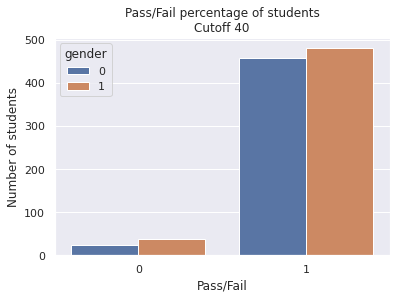

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


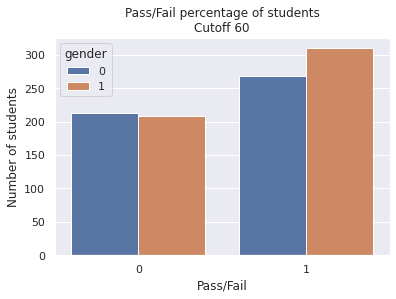

In [ ]:
# by gender
# pass fail percentages with ADS cut-offs
sns.countplot(student_df['Pass/Fail'], hue = student_df['gender'])
plt.ylabel('Number of students')
plt.title('Pass/Fail percentage of students\nCutoff 40')
plt.show()

# pass fail percentages with new cut-offs
sns.countplot(student_df_2['Pass/Fail'], hue = student_df_2['gender'])
plt.ylabel('Number of students')
plt.title('Pass/Fail percentage of students\nCutoff 60')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


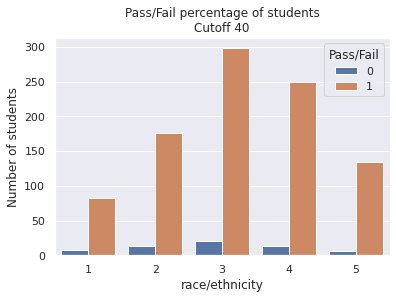

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


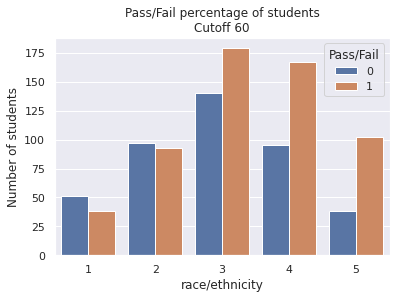

In [ ]:
# by race/ethnicity
# pass fail percentages with ADS cut-offs
sns.countplot(student_df['race/ethnicity'], hue=student_df['Pass/Fail'])
plt.ylabel('Number of students')
plt.title('Pass/Fail percentage of students\nCutoff 40')
plt.show()

# pass fail percentages with new cut-offs
sns.countplot(student_df_2['race/ethnicity'], hue=student_df_2['Pass/Fail'])
plt.ylabel('Number of students')
plt.title('Pass/Fail percentage of students\nCutoff 60')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


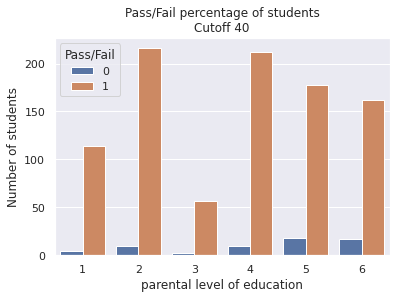

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


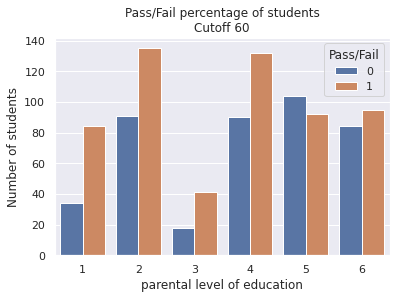

In [ ]:
# by parental education
# pass fail percentages with ADS cut-offs
sns.countplot(student_df['parental level of education'], hue=student_df['Pass/Fail'])
plt.ylabel('Number of students')
plt.title('Pass/Fail percentage of students\nCutoff 40')
plt.show()

# pass fail percentages with ADS cut-offs
sns.countplot(student_df_2['parental level of education'], hue=student_df_2['Pass/Fail'])
plt.ylabel('Number of students')
plt.title('Pass/Fail percentage of students\nCutoff 60')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


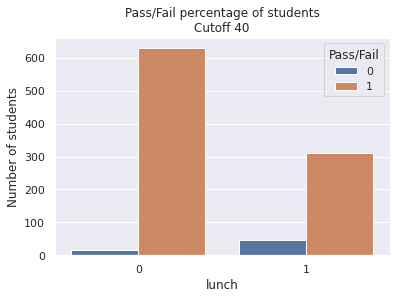

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


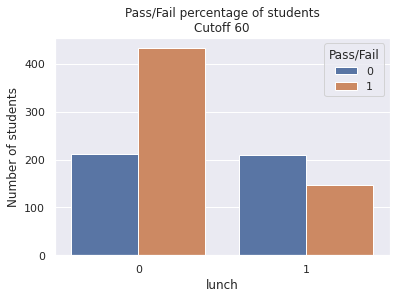

In [ ]:
# by lunch type
# pass fail percentages with ADS cut-offs
sns.countplot(student_df['lunch'], hue=student_df['Pass/Fail'])
plt.ylabel('Number of students')
plt.title('Pass/Fail percentage of students\nCutoff 40')
plt.show()

# pass fail percentages with ADS cut-offs
sns.countplot(student_df_2['lunch'], hue=student_df_2['Pass/Fail'])
plt.ylabel('Number of students')
plt.title('Pass/Fail percentage of students\nCutoff 60')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


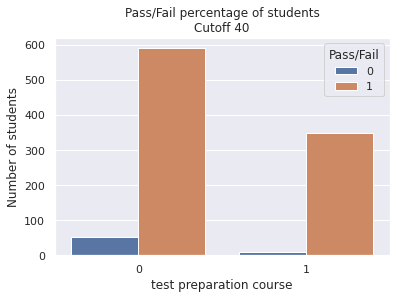

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


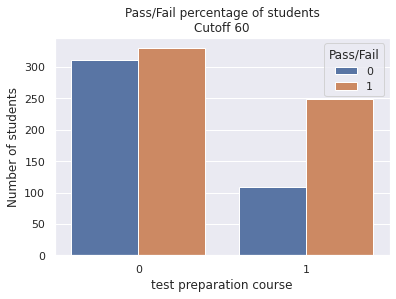

In [ ]:
# by test prep course
# pass fail percentages with ADS cut-offs
sns.countplot(student_df['test preparation course'], hue=student_df['Pass/Fail'])
plt.ylabel('Number of students')
plt.title('Pass/Fail percentage of students\nCutoff 40')
plt.show()

# pass fail percentages with ADS cut-offs
sns.countplot(student_df_2['test preparation course'], hue=student_df_2['Pass/Fail'])
plt.ylabel('Number of students')
plt.title('Pass/Fail percentage of students\nCutoff 60')
plt.show()

# **Fairness metrics**

In [ ]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Pass/Fail
0,1,2,1,0,0,72,72,74,218,1
1,1,3,2,0,1,69,90,88,247,1
2,1,2,3,0,0,90,95,93,278,1
3,0,1,4,1,0,47,57,44,148,1
4,0,3,2,0,0,76,78,75,229,1


In [ ]:
student_df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Pass/Fail
0,1,2,1,0,0,72,72,74,218,1
1,1,3,2,0,1,69,90,88,247,1
2,1,2,3,0,0,90,95,93,278,1
3,0,1,4,1,0,47,57,44,148,0
4,0,3,2,0,0,76,78,75,229,1


In [ ]:
# copy datasets

# for ADS pass/fail cut-offs
gender_student_df = student_df.copy()
lunch_student_df = student_df.copy()
test_prep_student_df = student_df.copy()

# for new pass/fail cut-offs
gender_student_df_2 = student_df_2.copy()
lunch_student_df_2 = student_df_2.copy()
test_prep_student_df_2 = student_df_2.copy()

Exploring bias in gender

In [ ]:
# for ADS pass/fail cut-offs
np.random.seed(15)
protected_attr = 'gender'
target = 'Pass/Fail' 

privileged_groups = [{'gender': 0}]
unprivileged_groups = [{'gender': 1}]

gender_student_df = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df = gender_student_df,
    label_names=[target],
    protected_attribute_names=[protected_attr])
    
metric_orig_train = BinaryLabelDatasetMetric(
    gender_student_df,
    unprivileged_groups=privileged_groups ,
    privileged_groups=unprivileged_groups 
    )

json_expl = MetricJSONExplainer(metric_orig_train)
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict),
                      indent=2)

In [ ]:
display(Markdown("#### Gender in original dataset; ADS thresholds"))
print(format_json(json_expl.mean_difference()))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

print(format_json(json_expl.disparate_impact()))
print("Disparate Impact = %f" % metric_orig_train.disparate_impact())

#### Gender in original dataset; ADS thresholds

{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): 0.0216360403082394",
  "numPositivesUnprivileged": 458.0,
  "numInstancesUnprivileged": 482.0,
  "numPositivesPrivileged": 481.0,
  "numInstancesPrivileged": 518.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}
Difference in mean outcomes between unprivileged and privileged groups = 0.021636
{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.023300351101181",
  "numPositivePredictionsUnprivileged": 458.0,
  "numUnprivileged": 482.0,
  "numPositivePredictionsPrivileged": 481.0,
  "numPrivileged": 518.0,
  "description": "Computed as the ratio of rate of fa

In [ ]:
# for new pass/fail cut-offs
np.random.seed(15)
protected_attr = 'gender'
target = 'Pass/Fail' 

privileged_groups = [{'gender': 0}]
unprivileged_groups = [{'gender': 1}]

gender_student_df = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df = gender_student_df_2,
    label_names=[target],
    protected_attribute_names=[protected_attr])

metric_orig_train = BinaryLabelDatasetMetric(
    gender_student_df,
    unprivileged_groups=privileged_groups ,
    privileged_groups=unprivileged_groups 
    )

json_expl = MetricJSONExplainer(metric_orig_train)
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict),
                      indent=2)

In [ ]:
display(Markdown("#### Gender in original dataset; new thresholds"))
print(format_json(json_expl.mean_difference()))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

print(format_json(json_expl.disparate_impact()))
print("Disparate Impact = %f" % metric_orig_train.disparate_impact())

#### Gender in original dataset; new thresholds

{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -0.04036431214854452",
  "numPositivesUnprivileged": 269.0,
  "numInstancesUnprivileged": 482.0,
  "numPositivesPrivileged": 310.0,
  "numInstancesPrivileged": 518.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}
Difference in mean outcomes between unprivileged and privileged groups = -0.040364
{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.9325525364743675",
  "numPositivePredictionsUnprivileged": 269.0,
  "numUnprivileged": 482.0,
  "numPositivePredictionsPrivileged": 310.0,
  "numPrivileged": 518.0,
  "description": "Computed as the ratio of rate o

Exploring bias in lunch type

In [ ]:
# for ADS pass/fail cut-offs
np.random.seed(15)
protected_attr = 'lunch' 
target = 'Pass/Fail' 

privileged_groups = [{protected_attr: 0}]
unprivileged_groups = [{protected_attr: 1}]


lunch_student_df = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df = lunch_student_df,
    label_names=['Pass/Fail'],
    protected_attribute_names=[protected_attr])
    
metric_orig_train = BinaryLabelDatasetMetric(
    lunch_student_df,
    unprivileged_groups=privileged_groups ,
    privileged_groups=unprivileged_groups
    )

json_expl = MetricJSONExplainer(metric_orig_train)
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict),
                      indent=2)

In [ ]:
display(Markdown("#### Lunch in original dataset; ADS thresholds"))
print(format_json(json_expl.mean_difference()))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

print(format_json(json_expl.disparate_impact()))
print("Disparate Impact = %f" % metric_orig_train.disparate_impact())

#### Lunch in original dataset; ADS thresholds

{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): 0.10195436182989415",
  "numPositivesUnprivileged": 629.0,
  "numInstancesUnprivileged": 645.0,
  "numPositivesPrivileged": 310.0,
  "numInstancesPrivileged": 355.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}
Difference in mean outcomes between unprivileged and privileged groups = 0.101954
{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.1167541885471368",
  "numPositivePredictionsUnprivileged": 629.0,
  "numUnprivileged": 645.0,
  "numPositivePredictionsPrivileged": 310.0,
  "numPrivileged": 355.0,
  "description": "Computed as the ratio of rate of 

In [ ]:
# for new pass/fail cut-offs
np.random.seed(15)
protected_attr = 'lunch' 
target = 'Pass/Fail' 

privileged_groups = [{protected_attr: 0}]
unprivileged_groups = [{protected_attr: 1}]


lunch_student_df = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df = lunch_student_df_2,
    label_names=['Pass/Fail'],
    protected_attribute_names=[protected_attr])
    
metric_orig_train = BinaryLabelDatasetMetric(
    lunch_student_df,
    unprivileged_groups=privileged_groups ,
    privileged_groups=unprivileged_groups
    )

json_expl = MetricJSONExplainer(metric_orig_train)
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict),
                      indent=2)

In [ ]:
display(Markdown("#### Lunch in original dataset; new thresholds"))
print(format_json(json_expl.mean_difference()))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

print(format_json(json_expl.disparate_impact()))
print("Disparate Impact = %f" % metric_orig_train.disparate_impact())

#### Lunch in original dataset; new thresholds

{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): 0.26005022382356147",
  "numPositivesUnprivileged": 433.0,
  "numInstancesUnprivileged": 645.0,
  "numPositivesPrivileged": 146.0,
  "numInstancesPrivileged": 355.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}
Difference in mean outcomes between unprivileged and privileged groups = 0.260050
{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.6323139003929064",
  "numPositivePredictionsUnprivileged": 433.0,
  "numUnprivileged": 645.0,
  "numPositivePredictionsPrivileged": 146.0,
  "numPrivileged": 355.0,
  "description": "Computed as the ratio of rate of 

Exploring bias in test prep

In [ ]:
# for ADS pass/fail cut-offs
np.random.seed(15)
protected_attr = 'test preparation course'
target = 'Pass/Fail' 

privileged_groups = [{protected_attr: 1}]
unprivileged_groups = [{protected_attr: 0}]

test_prep_student_df = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df = test_prep_student_df,
    label_names=['Pass/Fail'],
    protected_attribute_names=[protected_attr])
    
metric_orig_train = BinaryLabelDatasetMetric(
    test_prep_student_df,
    unprivileged_groups=privileged_groups ,
    privileged_groups=unprivileged_groups
    )

json_expl = MetricJSONExplainer(metric_orig_train)
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict),
                      indent=2)

In [ ]:
display(Markdown("#### Test prep in original dataset; ADS thresholds"))
print(format_json(json_expl.mean_difference()))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

print(format_json(json_expl.disparate_impact()))
print("Disparate Impact = %f" % metric_orig_train.disparate_impact())

#### Test prep in original dataset; ADS thresholds

{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): 0.05150629144259378",
  "numPositivesUnprivileged": 348.0,
  "numInstancesUnprivileged": 358.0,
  "numPositivesPrivileged": 591.0,
  "numInstancesPrivileged": 642.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}
Difference in mean outcomes between unprivileged and privileged groups = 0.051506
{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.0559509967955079",
  "numPositivePredictionsUnprivileged": 348.0,
  "numUnprivileged": 358.0,
  "numPositivePredictionsPrivileged": 591.0,
  "numPrivileged": 642.0,
  "description": "Computed as the ratio of rate of 

In [ ]:
# for new pass/fail cut-offs
np.random.seed(15)
protected_attr = 'test preparation course'
target = 'Pass/Fail' 

privileged_groups = [{protected_attr: 1}]
unprivileged_groups = [{protected_attr: 0}]

test_prep_student_df = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df = test_prep_student_df_2,
    label_names=['Pass/Fail'],
    protected_attribute_names=[protected_attr])
    
metric_orig_train = BinaryLabelDatasetMetric(
    test_prep_student_df,
    unprivileged_groups=privileged_groups ,
    privileged_groups=unprivileged_groups
    )

json_expl = MetricJSONExplainer(metric_orig_train)
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict),
                      indent=2)

In [ ]:
display(Markdown("#### Test prep in original dataset; new thresholds"))
print(format_json(json_expl.mean_difference()))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

print(format_json(json_expl.disparate_impact()))
print("Disparate Impact = %f" % metric_orig_train.disparate_impact())

#### Test prep in original dataset; new thresholds

{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): 0.1815120346681982",
  "numPositivesUnprivileged": 249.0,
  "numInstancesUnprivileged": 358.0,
  "numPositivesPrivileged": 330.0,
  "numInstancesPrivileged": 642.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}
Difference in mean outcomes between unprivileged and privileged groups = 0.181512
{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.3531234128999492",
  "numPositivePredictionsUnprivileged": 249.0,
  "numUnprivileged": 358.0,
  "numPositivePredictionsPrivileged": 330.0,
  "numPrivileged": 642.0,
  "description": "Computed as the ratio of rate of f

# **Machine learning modeling**

In [ ]:
# helper function for pre-processing data and performing 80/20 split
def split_data(student_df):
  X = student_df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']] # input variables
  X.head()
  X_category = student_df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
  
  # one hot encoding
  OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
  X_OH = pd.DataFrame(OH_encoder.fit_transform(X_category))
  X_OH.index = X.index 
  X_OH.head()

  # outcome variable
  y = student_df['Pass/Fail']
  y.head()

  # label encoding
  lb = LabelEncoder()
  y = lb.fit_transform(y)

  X_train, X_valid, y_train, y_valid = train_test_split(X_OH, y, train_size=0.8, test_size=0.2,random_state=0)

  return X_train, X_valid, y_train, y_valid

In [ ]:
### Random Forest Regressor
# ADS pass/fail cut-offs
student = student_df.copy()

# split data
X_train, X_valid, y_train, y_valid = split_data(student)

# train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# model predictions
preds = model.predict(X_valid)

# model evaluation
print('mae: ', mae(y_valid, preds))
r_squared = model.score(X_valid,y_valid)
print('r^2: ', r_squared)

mae:  0.11707354390290653
r^2:  -0.0884502443562516


In [ ]:
### Random Forest Classifier
# ADS pass/fail cut-offs
student = student_df.copy()

# split data
X_train, X_valid, y_train, y_valid = split_data(student)

# train model
model = RandomForestClassifier()
model.fit(X_train,y_train)

# model predictions
preds = model.predict(X_valid)

# model evaluation
print('accuracy: ', accuracy_score(y_valid, preds))
print('mae: ', mae(y_valid, preds))
print('f1: ', f1_score(y_valid, preds))
print('auc: ', roc_auc_score(y_valid, preds))

accuracy:  0.91
mae:  0.09
f1:  0.9528795811518325
auc:  0.4918918918918919


In [ ]:
# AUC and ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, preds)
roc_auc = auc(fpr, tpr)
print('auc: ', roc_auc)

auc:  0.4918918918918919


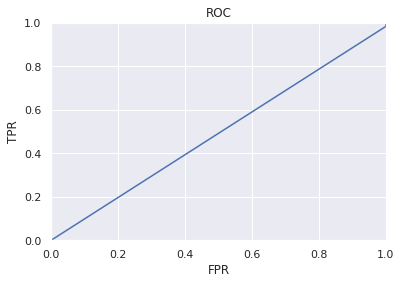

In [ ]:
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [ ]:
### Random Forest Regressor
# new pass/fail cut-offs
student2 = student_df_2.copy()

# split data
X_train, X_valid, y_train, y_valid = split_data(student2)

# train model
model = RandomForestRegressor()
model.fit(X_train,y_train)

# model predictions
preds = model.predict(X_valid)

# model evaluation
print('mae: ', mae(y_valid, preds))
r_squared = model.score(X_valid,y_valid)
print('r^2: ', r_squared)

mae:  0.446838051717819
r^2:  -0.1604148259962821


In [ ]:
### Random Forest Classifier
# new pass/fail cut-offs
student2 = student_df_2.copy()

# split data
X_train, X_valid, y_train, y_valid = split_data(student2)

# train model
model = RandomForestClassifier()
model.fit(X_train,y_train)

# model predictions
preds = model.predict(X_valid)

# model evaluation
print('accuracy: ', accuracy_score(y_valid, preds))
print('mae: ', mae(y_valid, preds))
print('f1: ', f1_score(y_valid, preds))
print('auc: ', roc_auc_score(y_valid, preds))

accuracy:  0.52
mae:  0.48
f1:  0.5636363636363636
auc:  0.5161158710730314


In [ ]:
# AUC and ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, preds)
roc_auc = auc(fpr, tpr)
print('auc: ', roc_auc)

auc:  0.5161158710730314


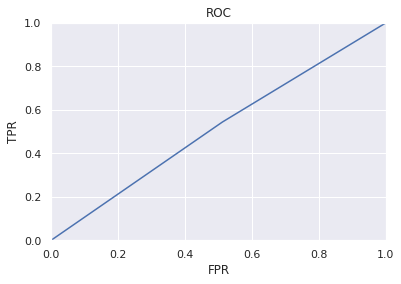

In [ ]:
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

# **Synthetic datasets to test model stability**

In [ ]:
# set-up

description_files = {'random mode':                   'description(random).json', 
                     'independent attribute mode':    'description(independent).json', 
                     'correlated attribute mode':     'description(correlated).json'}

synthetic_data_files = {'random mode':                'synthetic data(random).csv', 
                        'independent attribute mode': 'synthetic data(independent).csv', 
                        'correlated attribute mode':  'synthetic data(correlated).csv'}


# sensitive_data_file ='/content/drive/My Drive/Colab Notebooks/data/StudentsPerformance.csv'
sensitive_data_file ='/content/drive/My Drive/RDS project/StudentsPerformance.csv'

real_data = pd.read_csv(sensitive_data_file)
real_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# intialize a describer and a generator
describer = DataDescriber()
generator = DataGenerator()

In [ ]:
output_data_size = real_data.size

Random mode

In [ ]:
# create synthetic data
describer.describe_dataset_in_random_mode(sensitive_data_file)
describer.save_dataset_description_to_file(description_files['random mode'])
generator.generate_dataset_in_random_mode(n=output_data_size, 
                                          description_file=description_files['random mode'], 
                                          seed=0, 
                                          minimum=0, 
                                          maximum=100)

generator.save_synthetic_data(synthetic_data_files['random mode'])
synthetic_random = pd.read_csv(synthetic_data_files['random mode'])

In [ ]:
synthetic_random.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,high school,free/reduced,none,30,77,13
1,male,group C,associate's degree,standard,completed,57,81,92
2,male,group D,master's degree,standard,completed,19,47,67
3,female,group E,bachelor's degree,free/reduced,completed,92,47,1
4,male,group E,some high school,free/reduced,none,48,46,11


In [ ]:
# train and test Random Forest Classifier model based on new pass/fail cut-offs
synthetic_random_2 = preprocess_2(synthetic_random)

X_train, X_valid, y_train, y_valid = split_data(synthetic_random_2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_valid)

# evaluate model
print('accuracy: ', accuracy_score(y_valid, preds))
print('mae: ', mae(y_valid, preds))
print('f1: ', f1_score(y_valid, preds))
print('auc: ', roc_auc_score(y_valid, preds))

accuracy:  0.936875
mae:  0.063125
f1:  0.0
auc:  0.5


Independent mode

In [ ]:
# create synthetic data
describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon=0.1)
describer.save_dataset_description_to_file(description_files['independent attribute mode'])
generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                          description_file=description_files['independent attribute mode'], 
                                          seed=0)

generator.save_synthetic_data(synthetic_data_files['independent attribute mode'])
synthetic_independent = pd.read_csv(synthetic_data_files['independent attribute mode'])
synthetic_independent.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,high school,free/reduced,completed,49.0,42.0,85.0
1,male,group C,some college,free/reduced,completed,19.0,18.0,64.0
2,male,group D,associate's degree,free/reduced,completed,62.0,84.0,63.0
3,male,group A,bachelor's degree,standard,completed,11.0,84.0,64.0
4,male,group A,associate's degree,free/reduced,completed,18.0,89.0,98.0


In [ ]:
# train and test Random Forest Classifier model based on new pass/fail cut-offs
synthetic_independent_2 = preprocess_2(synthetic_independent)

X_train, X_valid, y_train, y_valid = split_data(synthetic_independent_2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_valid)

# evaluate model
print('accuracy: ', accuracy_score(y_valid, preds))
print('mae: ', mae(y_valid, preds))
print('f1: ', f1_score(y_valid, preds))
print('auc: ', roc_auc_score(y_valid, preds))

accuracy:  0.880625
mae:  0.119375
f1:  0.0
auc:  0.4978798586572438


Correlated mode

In [ ]:
# create synthetic data
describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, epsilon=0.1, k = 2)
describer.save_dataset_description_to_file(description_files['correlated attribute mode'])
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                          description_file=description_files['correlated attribute mode'], 
                                          seed=0)


generator.save_synthetic_data(synthetic_data_files['correlated attribute mode'])
synthetic_correlated = pd.read_csv(synthetic_data_files['correlated attribute mode'])
synthetic_correlated.head()

================ Constructing Bayesian Network (BN) ================
Adding ROOT reading score
Adding attribute test preparation course
Adding attribute math score
Adding attribute lunch
Adding attribute parental level of education
Adding attribute race/ethnicity
Adding attribute writing score
Adding attribute gender
========================== BN constructed ==========================


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,some high school,standard,completed,4.0,63.0,58.0
1,female,group B,bachelor's degree,free/reduced,completed,19.0,76.0,23.0
2,male,group D,some college,standard,completed,7.0,67.0,50.0
3,female,group A,some high school,standard,completed,1.0,63.0,69.0
4,female,group C,bachelor's degree,free/reduced,completed,78.0,56.0,89.0


In [ ]:
# train and test Random Forest Classifier model based on new pass/fail cut-offs
synthetic_correlated_2 = preprocess_2(synthetic_correlated)

X_train, X_valid, y_train, y_valid = split_data(synthetic_correlated_2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_valid)

# evaluate model
print('accuracy: ', accuracy_score(y_valid, preds))
print('mae: ', mae(y_valid, preds))
print('f1: ', f1_score(y_valid, preds))
print('auc: ', roc_auc_score(y_valid, preds))

accuracy:  0.899375
mae:  0.100625
f1:  0.0
auc:  0.4993060374739764


# **SHAP**

In [ ]:
# helper function for pre-processing data prior to using SHAP
def split_data_shap(student_df):
  X = student_df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
  X.head()
  X_category = student_df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
  y = student_df['Pass/Fail']
  y.head()

  lb = LabelEncoder()
  y = lb.fit_transform(y)

  X_train, X_valid, y_train, y_valid = train_test_split(X_category, y, train_size=0.8, test_size=0.2,random_state=0)

  return X_train, X_valid, y_train, y_valid


# use ADS pass/fail cut-offs
X_train, X_valid, y_train, y_valid = split_data_shap(student)
model_shap = RandomForestClassifier()
model_shap.fit(X_train, y_train)
preds = model_shap.predict(X_valid)

In [ ]:
import shap

# initialize explainer
explainer = shap.TreeExplainer(model_shap, X_train, feature_perturbation="interventional")

# apply it to test data
shap_values = explainer.shap_values(X_valid)

In [ ]:
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course
687,0,4,4,1,0
500,1,4,3,0,0
332,0,5,4,0,1
979,1,3,4,0,0
817,0,4,1,1,1
...,...,...,...,...,...
835,1,3,5,0,1
192,1,2,6,0,0
629,1,3,6,0,1
559,0,4,6,0,0


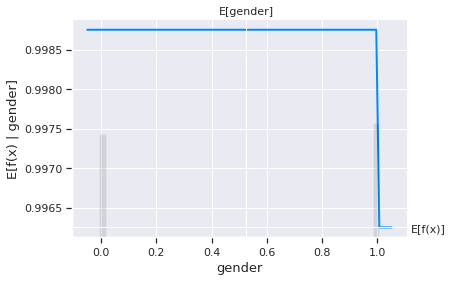

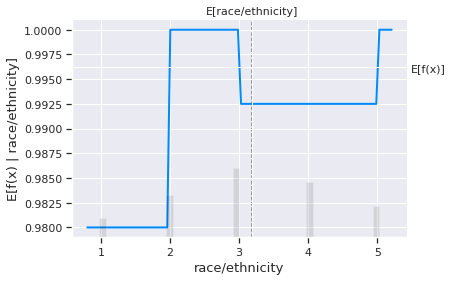

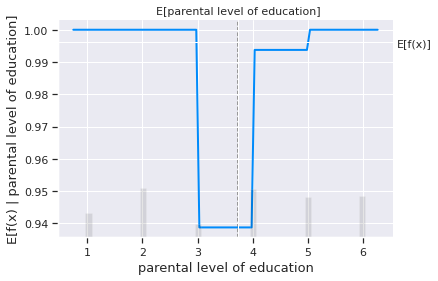

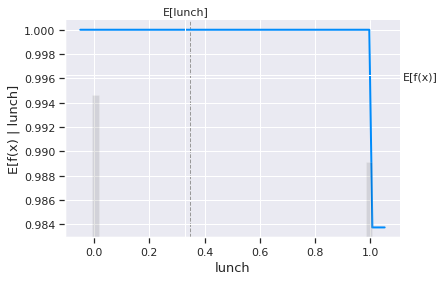

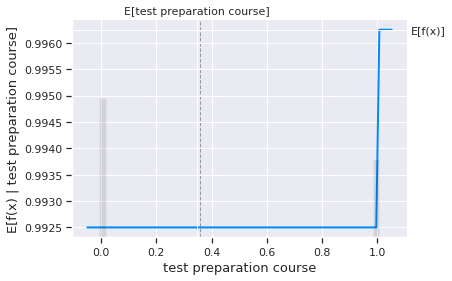

In [ ]:
# generate partial dependence plots for features

for i in range(5):
  shap.partial_dependence_plot(
      i, model_shap.predict, X_train, ice=False,
      model_expected_value=True, feature_expected_value=True
      )